# 01. Data Exploration and Analysis

**Objective**: Understand the financial sentiment datasets and perform exploratory data analysis.

## 📋 Tasks for you to complete:
3. Examine text characteristics (length, vocabulary, etc.)
4. Identify data quality issues
5. Visualize key insights

## 0. Setup and Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from wordcloud import WordCloud
from collections import Counter

# Set up plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

## 1. Data Loading

Download and load the Financial PhraseBank dataset
- Dataset URL: https://www.researchgate.net/publication/251231107_FinancialPhraseBank-v10

### 1.1 Concatenate All Data

In [8]:
import glob

# File paths
txt_file_path = '../data/raw/financial_phrasebank.txt'
csv_file_path = '../data/raw/financial_phrasebank.csv'

# Combine all text files into one
txt_files = glob.glob('../data/raw/Sentences_*.txt')
with open(txt_file_path, 'w', encoding='utf-8') as outfile:
    for fname in txt_files:
        # Use 'latin1' encoding to avoid UnicodeDecodeError
        with open(fname, 'r', encoding='latin1') as infile:
            outfile.write(infile.read())

### 1.2 Convert ```financial_phrasebank.txt``` into ```financial_phrasebank.csv```

In [10]:
# Convert the combined text file to CSV
df = pd.read_csv(txt_file_path, delimiter='@', header=None, names=['text', 'sentiment'])
df.to_csv(csv_file_path, index=False)
print(f"CSV file saved to: {csv_file_path}")

# Display df
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
display(df)

CSV file saved to: ../data/raw/financial_phrasebank.csv


,text,sentiment
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive
...,...,...
14775,HELSINKI Thomson Financial - Shares in Cargote...,negative
14776,LONDON MarketWatch -- Share prices ended lower...,negative
14777,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
14778,Operating profit fell to EUR 35.4 mn from EUR ...,negative


## 2. Basic Data Exploration

### 2.1 Dataframe Head Sample

In [23]:
df.head()

,text,sentiment
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


### 2.2 Data types

In [ ]:
print(f"Data types of the database (column, data type): \n{df.dtypes}")

### 2.3 Missing Values

In [22]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

## 3. Sentiment Distribution Analysis

Sentiment distribution:


sentiment
neutral     8951
positive    3988
negative    1841
Name: count, dtype: int64

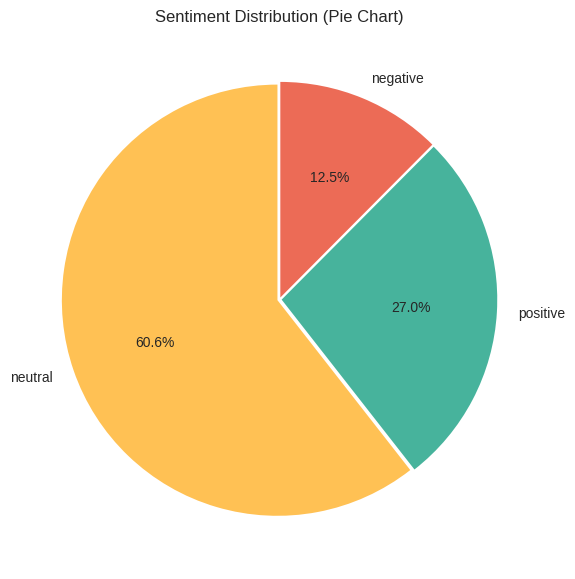

In [ ]:
# -------------------------- SENTIMENT DISTRIBUTION -------------------------- #
print("Sentiment distribution:")
df['sentiment'].value_counts()
# ---------------------------------------------------------------------------- #

# ------------------- PIE CHART FOR SENTIMENT DISTRIBUTION ------------------- #
plt.figure(figsize=(7, 7))
df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#FFC154', '#47B39C', '#EC6B56'],
    startangle=90,
    explode=[0.01, 0.01, 0.01]
)
plt.title('Sentiment Distribution (Pie Chart)')
plt.ylabel('')
# ---------------------------------------------------------------------------- #

## 4. Text Characteristics Analysis

### 4.1 Text Length Distribution

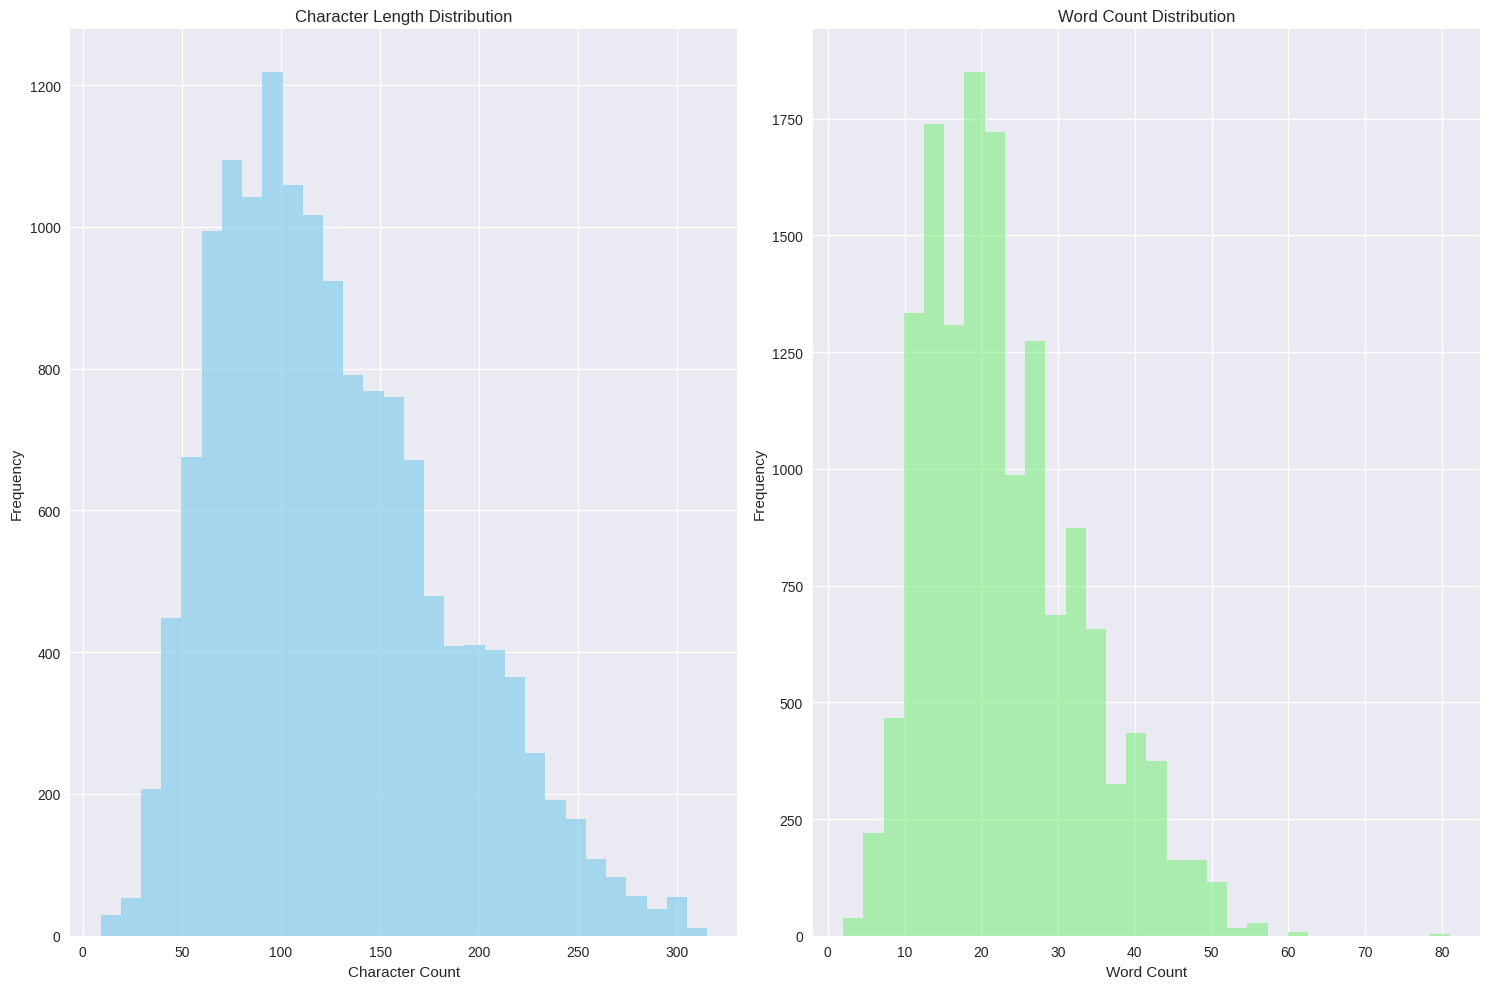

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Text length distribution
df['text_length_chars'] = df['text'].str.len()
df['text_length_words'] = df['text'].str.split().str.len()

# Character length histogram
axes[0].hist(df['text_length_chars'], bins=30, alpha=0.7, color='skyblue')
axes[0].set_title('Character Length Distribution')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')

# Word count histogram
axes[1].hist(df['text_length_words'], bins=30, alpha=0.7, color='lightgreen')
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 4.2 Most Common Words For Sentiment Classes

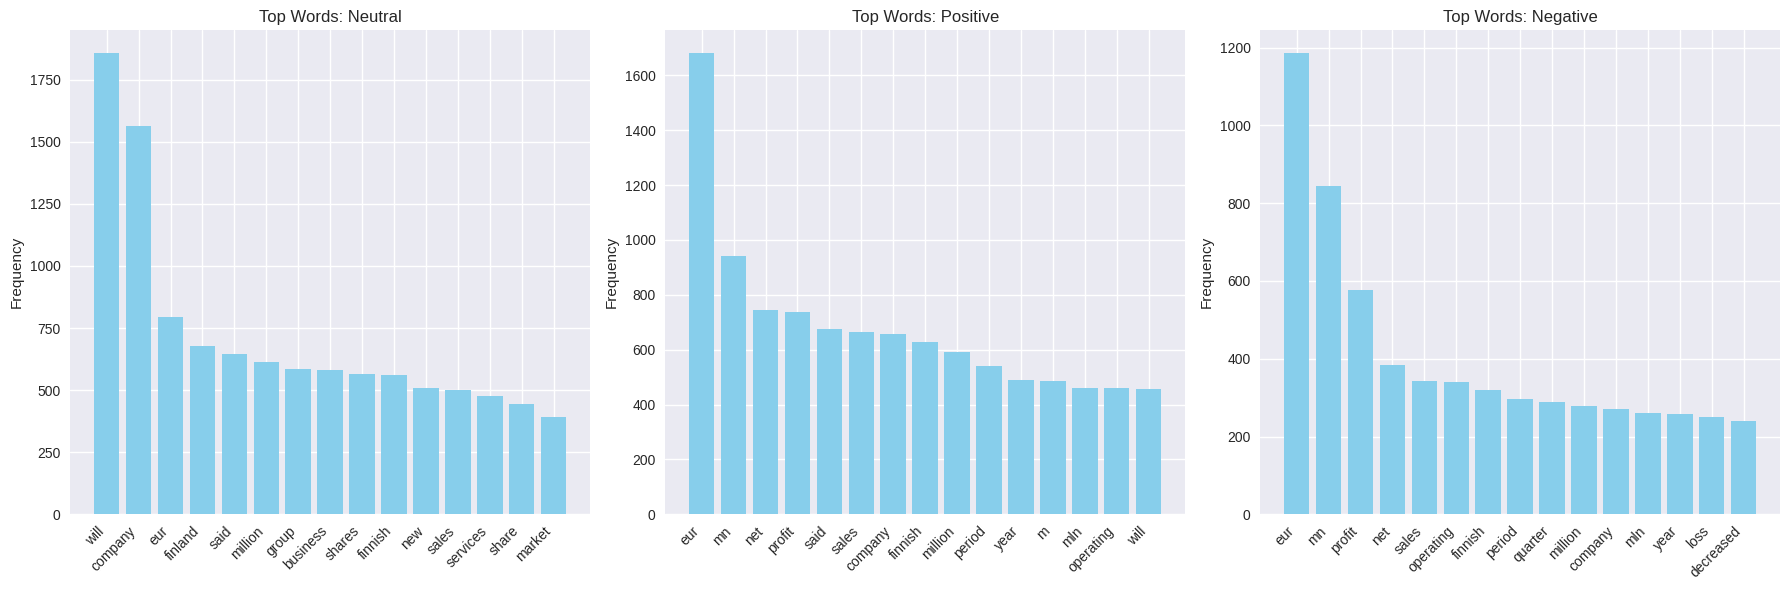

In [82]:
from wordcloud import STOPWORDS

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = df['sentiment'].unique()
for i, sentiment in enumerate(sentiments):
    words = df[df['sentiment'] == sentiment]['text'].str.lower().str.split().sum()
    filtered_words = [w for w in words if w not in STOPWORDS and w.isalpha()]
    common_words = Counter(filtered_words).most_common(15)
    labels, values = zip(*common_words)
    axes[i].bar(labels, values, color='skyblue')
    axes[i].set_title(f"Top Words: {sentiment.capitalize()}")
    axes[i].set_xticks(range(len(labels)))
    axes[i].set_xticklabels(labels, rotation=45, ha='right')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### 4.3 Average sentence length by sentiment

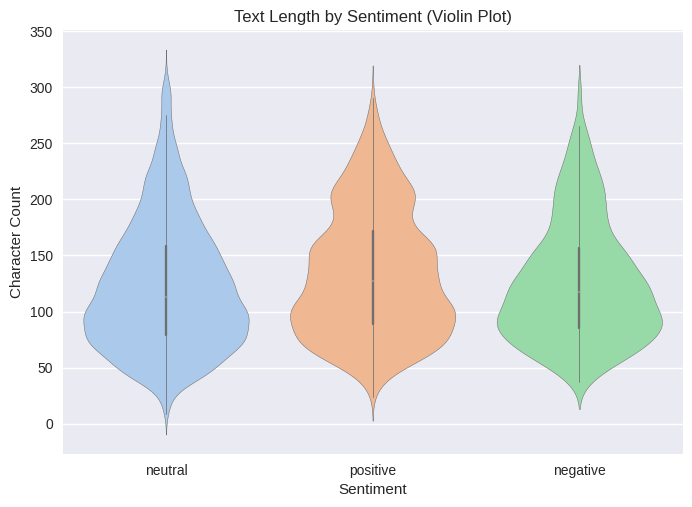

In [83]:
sns.violinplot(x='sentiment', y='text_length_chars', data=df, hue='sentiment', palette='pastel', legend=False)
plt.title('Text Length by Sentiment (Violin Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Character Count')
plt.show()

### 4.4 Word Clouds For Sentiment Classes

## Data Quality Assessment

In [ ]:
# TODO: Assess data quality
# 1. Check for duplicate texts
# 2. Identify very short or very long texts
# 3. Look for special characters, HTML tags, etc.
# 4. Identify potential noise in the data

Number of non-unique text entries: 9942


## Financial Domain Analysis

In [ ]:
# TODO: Analyze financial domain-specific characteristics
# 1. Extract financial terms and entities
# 2. Analyze sentiment patterns around financial keywords
# 3. Identify common financial phrases
# 4. Look for temporal patterns if dates are available

# Your code here

## Key Insights and Conclusions

**Your Task**: Summarize your findings and their implications for model development

### Questions to answer:
1. What is the distribution of sentiment classes?
2. Are there any data quality issues to address?
3. What are the key characteristics of financial text?
4. What preprocessing steps will be needed?
5. What challenges do you anticipate for the model?

### Next Steps:
- Data preprocessing strategy
- Model selection considerations
- Evaluation metrics planning

## 💡 Implementation Hints:

### Data Loading:
```python
# If you don't have the dataset yet, create sample data:
sample_data = {
    'text': [
        'Company profits exceeded expectations this quarter',
        'Stock prices fell sharply amid market uncertainty',
        'Revenue remained stable compared to last year'
    ],
    'sentiment': ['positive', 'negative', 'neutral']
}
df = pd.DataFrame(sample_data)
```

### Text Analysis:
```python
# Text length analysis
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
```

### Visualization:
```python
# Sentiment distribution
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()
```